# Modelo Inicial de Machine Learning

In [ ]:
%pip install lazypredict

In [1]:
import pandas as pd
import numpy as np
import pandas as pd

#Importamos librerías de sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [3]:
# Leer los datos
file_path = '../data/interim/bike_sharing_cleaned.csv'
df = pd.read_csv(file_path)

In [8]:
# Correr el nb previo para obtener funciones necesarias
%run ./bike_sharing_ml_project.ipynb

INICIANDO PIPELINE DE LIMPIEZA DE DATOS

--- PASO 1: CARGA DEL DATASET CRUDO ---
Datos cargados exitosamente desde: ../data/raw/bike_sharing_modified.csv

--- PASO 2: APLICANDO TRANSFORMACIONES DE LIMPIEZA ---

Columnas a eliminar: ['instant', 'mixed_type_col']
Columnas innecesarias eliminadas.

Iniciando corrección de tipos de datos...
Tipos de datos corregidos de forma semántica.

Iniciando validación de valores...
  -> Columna 'season': 168 valores inválidos convertidos a NaN.
  -> Columna 'yr': 136 valores inválidos convertidos a NaN.
  -> Columna 'mnth': 177 valores inválidos convertidos a NaN.
  -> Columna 'hr': 174 valores inválidos convertidos a NaN.
  -> Columna 'holiday': 96 valores inválidos convertidos a NaN.
  -> Columna 'weekday': 158 valores inválidos convertidos a NaN.
  -> Columna 'workingday': 120 valores inválidos convertidos a NaN.
  -> Columna 'weathersit': 180 valores inválidos convertidos a NaN.
  -> Columna 'hum': 167 valores inválidos convertidos a NaN.
  -> Co

In [9]:
# Al pasar el csv al dvc no s guardaron los tipos de datos, por lo que es necesario corregirlos
df = correct_initial_data_types(df)
df = finalize_data_types(df)


Iniciando corrección de tipos de datos...
Tipos de datos corregidos de forma semántica.

Puliendo los tipos de datos finales...
Tipos de datos finalizados.


In [13]:
# Función para one hot encoding
def one_hot_encoder(data,column):
    data = pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data = data.drop(columns = [column],axis=1)
    return data

In [11]:
# Funciones para métricas
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [14]:
# Función para graficar resultados
def plot_train_test(y_train,predicted_y_train,y_test,predicted_y_test):
    plt.figure(figsize=(7,7))
    plt.scatter(y_train,predicted_y_train,color='red',marker='X')
    plt.plot(range(int(min(y_train)),int(max(y_train))),color='black')
    plt.title('show actual and predicted train values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()
    plt.scatter(y_test,predicted_y_test,color='blue',marker='o')
    plt.plot(range(int(min(y_test)),int(max(y_test))),color='black')
    plt.title('show actual and predicted test values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()

In [15]:
# Función para entrenar y predecir
def Train_predict(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    predicted_train_data = model.predict(x_train)
    predicted_test_data = model.predict(x_test)
    plot_train_test(y_train,predicted_train_data,y_test,predicted_test_data)
    accuracy_train_pred = r2_score(y_train,predicted_train_data)
    accuracy_test_pred = r2_score(y_test,predicted_test_data)
    return [accuracy_train_pred,accuracy_test_pred]

In [16]:
# Definir columnas categoricas y numericas para su analisis exploratorio
cat_cols = df.select_dtypes(include=["category"]).columns.tolist()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
dt_cols = df.select_dtypes(include=["datetime64[ns]"]).columns.tolist()


In [17]:
df.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,NaT,1,0,1,0.00,0.00,6,0,1.00,0.24,0.29,0.81,0.00,3,13,16
1,NaT,1,0,1,1.00,0.00,6,0,1.00,0.22,0.27,0.80,0.00,8,32,40
2,NaT,1,0,1,2.00,0.00,6,0,1.00,0.22,0.27,0.80,0.00,5,27,32
3,NaT,1,0,1,3.00,0.00,6,0,1.00,0.24,0.29,0.75,0.00,3,10,13
4,NaT,1,0,1,4.00,0.00,6,0,1.00,0.24,0.29,0.75,0.00,0,1,1
5,NaT,1,0,1,5.00,0.00,6,0,2.00,0.24,0.26,0.75,0.09,0,1,1
6,NaT,1,0,1,6.00,0.00,6,0,1.00,0.22,0.27,0.80,0.00,2,0,2
7,NaT,1,0,1,8.00,0.00,6,0,1.00,0.24,0.29,0.75,0.00,1,7,8
8,NaT,1,0,1,9.00,0.00,6,0,1.00,0.32,0.35,0.76,0.00,8,6,14
9,NaT,1,0,1,10.00,0.00,6,0,1.00,0.38,0.39,0.76,0.25,12,24,36


In [71]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [18]:
for col in cat_cols:
    df_oh = one_hot_encoder(df,col)

In [19]:
# Definir X e y
target = 'cnt'
X = df_oh.drop(columns=[target, "casual", "registered", "dteday"])
y = df_oh[target]

# Hold out test del 20%
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 10% del train para validacion 
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.10, random_state=117
)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor 

In [23]:
modelos_a_optimizar = [
    ('RandomForest', RandomForestRegressor(random_state=117)),
    ('SVR', SVR()),
    ('XGBoost', XGBRegressor(random_state=117, eval_metric='rmse')) # Especificar eval_metric para evitar warnings
]

# 2. Define la cuadrícula de hiperparámetros para cada modelo
# (Las búsquedas de hiperparámetros pueden ser computacionalmente costosas, sé conservador)
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100],  # Número de árboles
        'max_depth': [5, 10]        # Profundidad máxima
    },
    'SVR': {
        'kernel': ['rbf'],          # Tipo de kernel
        'C': [0.1, 1, 10],          # Parámetro de regularización
        'gamma': ['scale']          # Coeficiente del kernel
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

# 3. Itera sobre los modelos, realiza el Grid Search y almacena los resultados
resultados_optimizacion = {}

print("\nIniciando el Loop de Hyperparámetros (Grid Search)...")

for nombre, modelo in modelos_a_optimizar:
    print(f"\n--- Optimizando {nombre} ---")
    
    # Crea el objeto GridSearchCV
    # Usa cv=3 para una búsqueda más rápida (3-fold Cross-Validation)
    grid_search = GridSearchCV(
        estimator=modelo, 
        param_grid=param_grids[nombre], 
        scoring='neg_mean_squared_error', # Métrica a optimizar (por ejemplo, RMSE es negativo del MSE)
        cv=3, 
        verbose=1, 
        n_jobs=-1 # Usa todos los núcleos disponibles
    )
    
    # Entrena el Grid Search
    grid_search.fit(X_train, y_train)
    
    # Almacena el mejor resultado
    resultados_optimizacion[nombre] = {
        'Mejor Puntuación (Neg MSE)': grid_search.best_score_,
        'Mejores Hyperparámetros': grid_search.best_params_,
        'Mejor Estimador': grid_search.best_estimator_
    }
    
    print(f"Mejor Neg MSE para {nombre}: {grid_search.best_score_:.4f}")
    print(f"Mejores Parámetros: {grid_search.best_params_}")

# Convertir a DataFrame para una mejor visualización
df_resultados = pd.DataFrame(resultados_optimizacion).T 

print("\n==================================")
print("Resultados Finales de la Optimización de Hyperparámetros:")
print(df_resultados[['Mejor Puntuación (Neg MSE)', 'Mejores Hyperparámetros']])


Iniciando el Loop de Hyperparámetros (Grid Search)...

--- Optimizando RandomForest ---
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejor Neg MSE para RandomForest: -2934.4357
Mejores Parámetros: {'max_depth': 10, 'n_estimators': 100}

--- Optimizando SVR ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejor Neg MSE para SVR: -28078.7244
Mejores Parámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

--- Optimizando XGBoost ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 1143, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 603, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py", line 1065, in _create_dmatrix
    return QuantileDMatrix(
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 1402, in next
    input_data(**self.kwargs)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 1447, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
  File "c:\Users\carmo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:season: category, yr: category, mnth: category, hr: category, holiday: category, weekday: category, workingday: category


In [74]:
reg = LazyRegressor(ignore_warnings=True, random_state=117, verbose=0)
models, preds  = reg.fit(X_train, X_val, y_train, y_val)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 10587, number of used features: 4
[LightGBM] [Info] Start training from score 188.330405


In [75]:
models.head(10)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.29,0.30,151.87,0.35
MLPRegressor,0.28,0.29,153.26,6.42
HistGradientBoostingRegressor,0.27,0.28,153.56,0.14
LGBMRegressor,0.27,0.28,153.97,0.07
NuSVR,0.24,0.25,156.65,2.29
ElasticNetCV,0.24,0.25,156.72,0.09
SGDRegressor,0.24,0.25,156.76,0.02
Lasso,0.24,0.25,156.77,0.06
LassoLars,0.24,0.25,156.77,0.01


In [ ]:
# Obtener un diccionario con los modelos
model_dictionary = reg.provide_models(X_train, X_test, y_train, y_test)

In [ ]:
# Top 10 modelos
top = models.index.tolist()[:10]

In [87]:
# Guardar en una lista
models_list = []
metrics_list = []

for model in top:
    model_pred = model_dictionary[model]

    y_hat = model_pred.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    mae  = mean_absolute_error(y_test, y_hat)
    r2   = r2_score(y_test, y_hat)
    
    models_list.append(model)
    metrics_list.append({"RMSE": rmse, "MAE": mae, "R2": r2})

# Convertir a DataFrame 
results_df = pd.DataFrame({
    'Model': models_list,
    'RMSE': [m['RMSE'] for m in metrics_list],
    'MAE': [m['MAE'] for m in metrics_list],
    'R2': [m['R2'] for m in metrics_list]
})

display(results_df)

,Model,RMSE,MAE,R2
0,GradientBoostingRegressor,154.14,114.19,0.29
1,MLPRegressor,155.97,115.69,0.27
2,HistGradientBoostingRegressor,154.16,114.53,0.29
3,LGBMRegressor,155.03,115.14,0.28
4,NuSVR,159.26,115.67,0.24
5,ElasticNetCV,158.54,118.33,0.24
6,SGDRegressor,158.54,118.24,0.24
7,Lasso,158.56,118.17,0.24
8,LassoLars,158.56,118.17,0.24
9,BayesianRidge,158.54,118.10,0.24


the model: LinearRegression() :


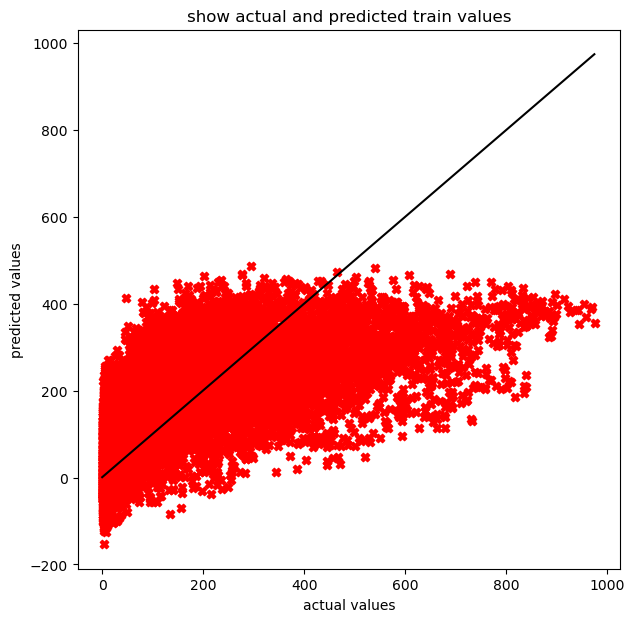

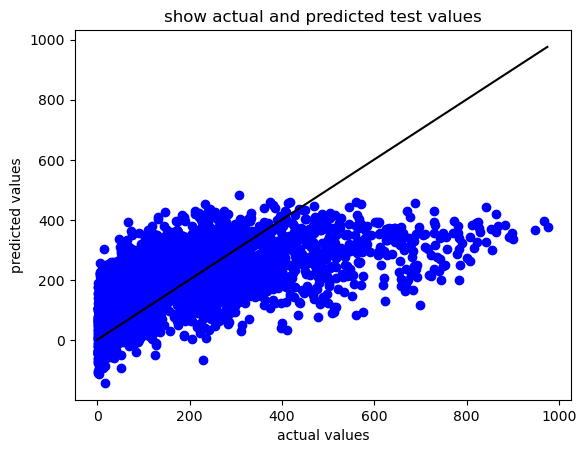

This model has r2  0.3837146897596909 on train data and 0.3857641373943351 on test data



the model: DecisionTreeRegressor() :


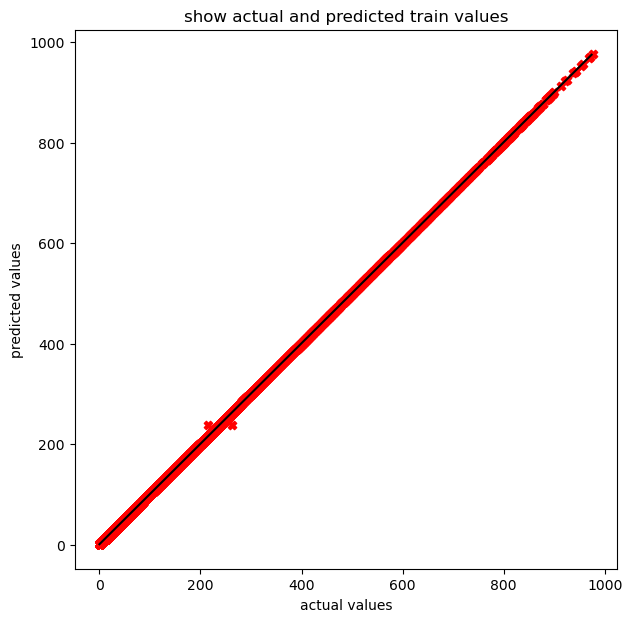

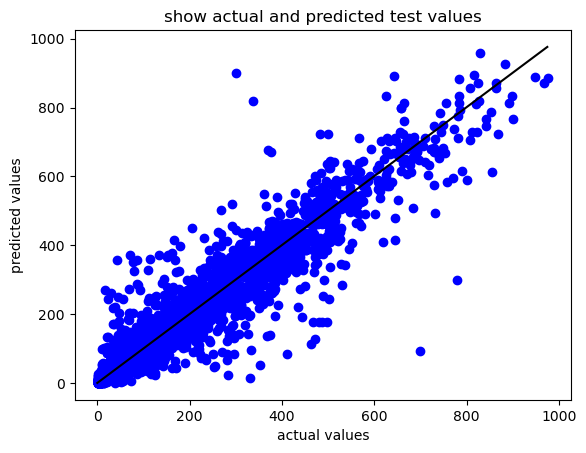

This model has r2  0.9999968652682788 on train data and 0.8879673119593041 on test data



the model: RandomForestRegressor() :


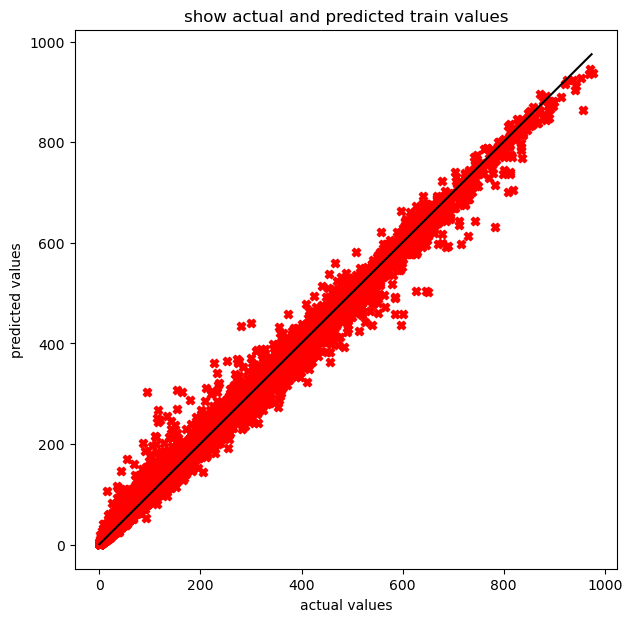

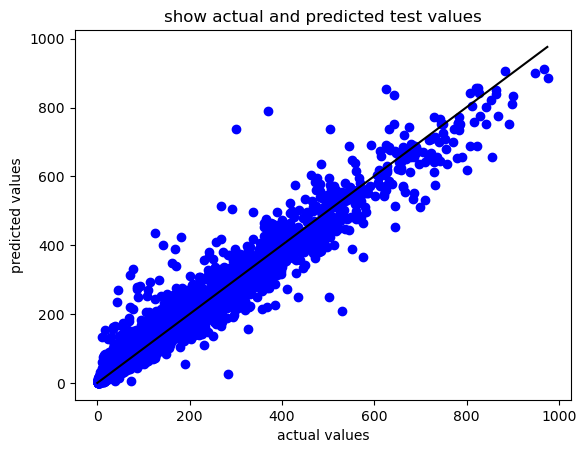

This model has r2  0.9915701658935206 on train data and 0.9418638560407878 on test data



the model: Ridge() :


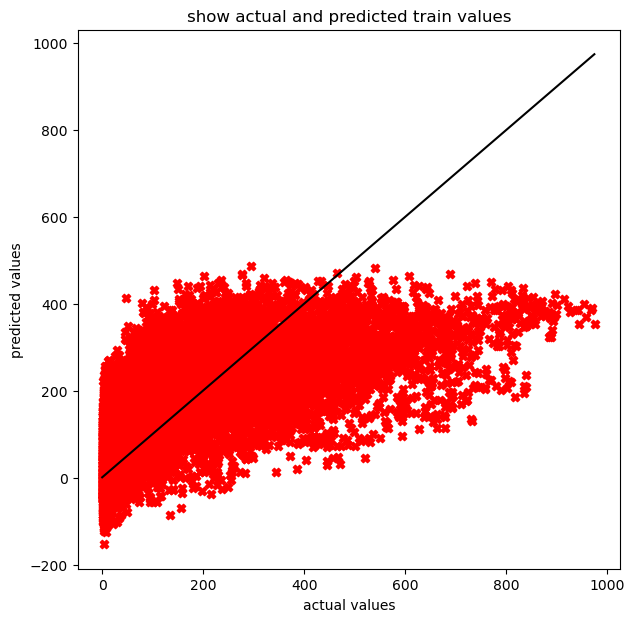

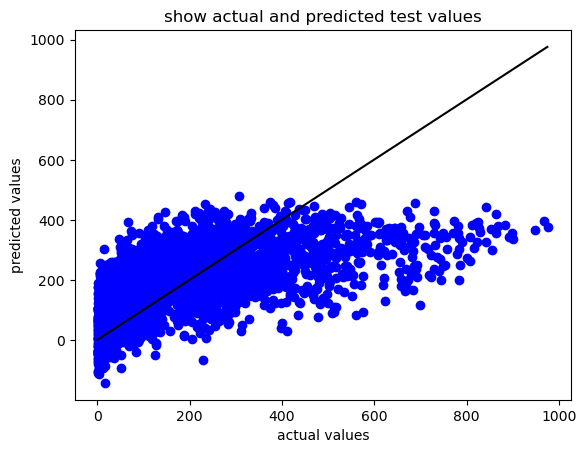

This model has r2  0.3837104053708885 on train data and 0.38581976186629496 on test data



the model: HuberRegressor() :


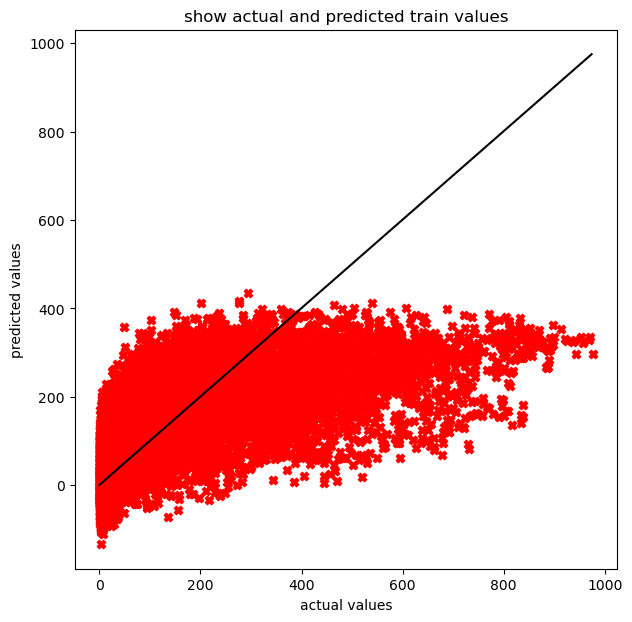

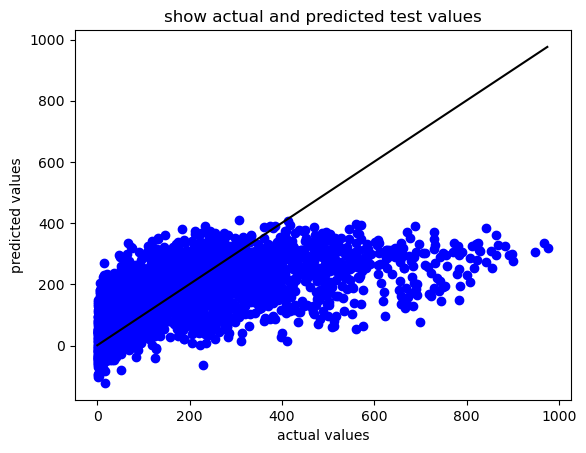

This model has r2  0.3498650646691037 on train data and 0.34674411322835397 on test data



the model: ElasticNetCV() :


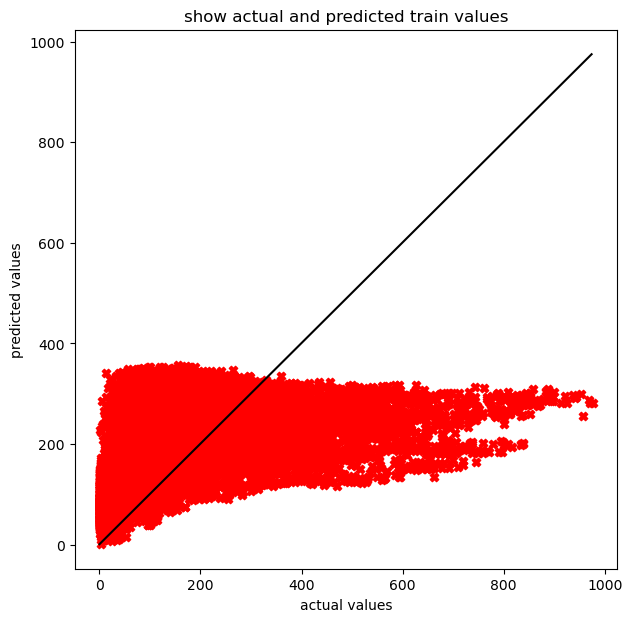

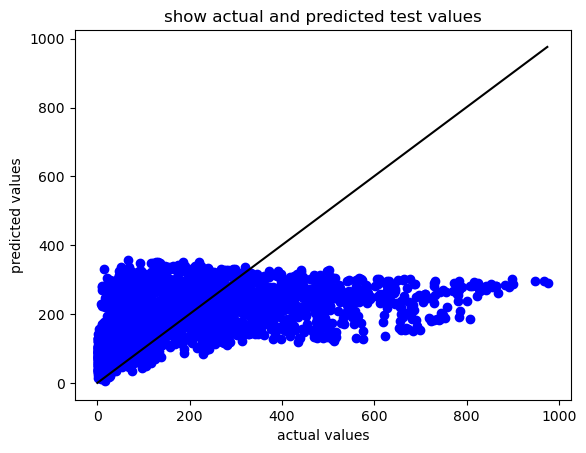

This model has r2  0.2469838072127204 on train data and 0.24135907717900396 on test data



the model: GradientBoostingRegressor() :


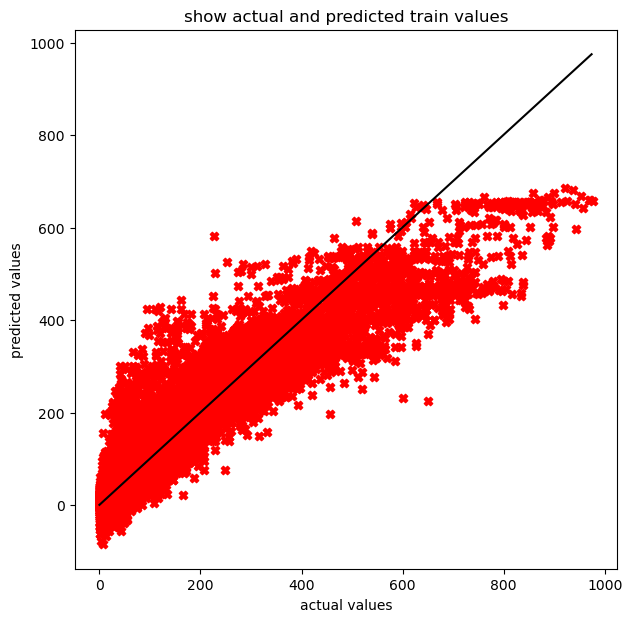

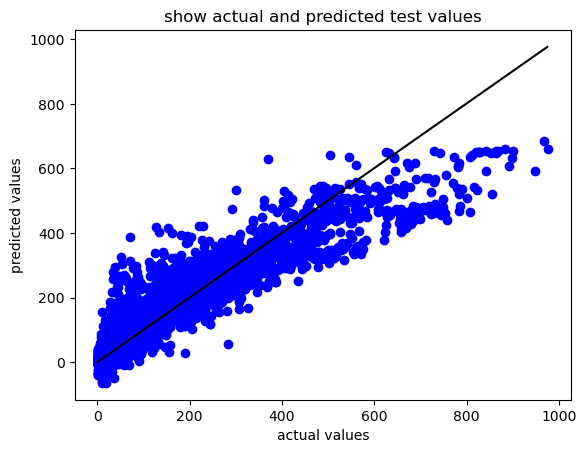

This model has r2  0.8448406321998816 on train data and 0.8400488768828567 on test data



the model: ExtraTreesRegressor() :


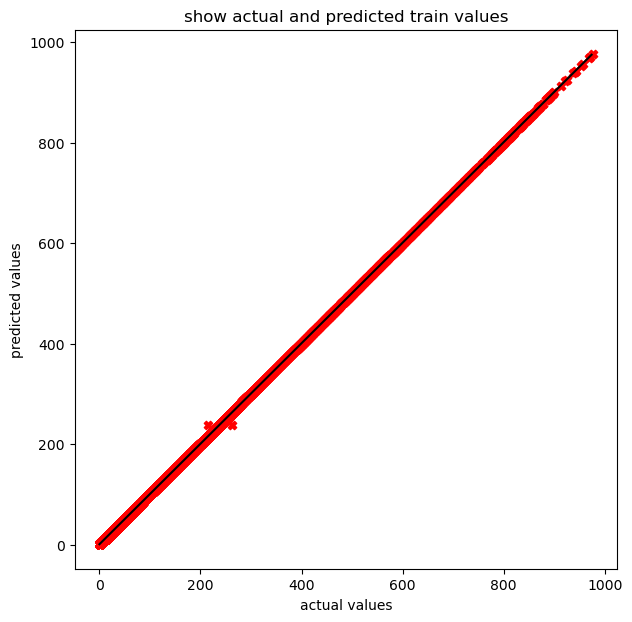

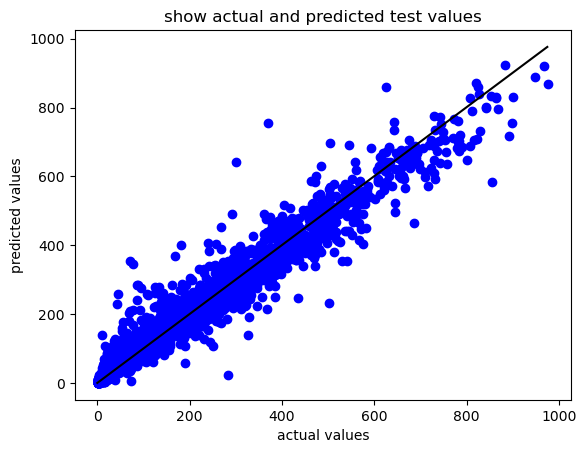

This model has r2  0.9999968454372509 on train data and 0.9488514744113381 on test data





In [88]:
# Definir modelos a evaluar
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    Ridge(),
    HuberRegressor(),
    ElasticNetCV(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor()
]

for model in models: 
    print("the model:",model,":")
    accuracy_train_pred, accuracy_test_pred = Train_predict(model,X_trainval,X_test,y_trainval,y_test)
    print("This model has r2 ",accuracy_train_pred,"on train data and",accuracy_test_pred,"on test data\n\n\n")